<a href="https://colab.research.google.com/github/RENISA-GRACELIN/Online_Internship_Projects/blob/main/1RN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import os
import numpy as np
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras import layers
from keras.applications.resnet50 import preprocess_input
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Data directories
train_dir = '/content/drive/MyDrive/A/Train'
test_dir = '/content/drive/MyDrive/A/Test'

Mounted at /content/drive


In [ ]:
# Image dimensions
img_width, img_height = 300, 300  # Adjust according to your image dimensions
batch_size = 32
num_epochs = 20

In [ ]:
# Load VGG16 model for feature extraction
model = ResNet50(weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
# Function to extract features from an image
def extract_features_efficientnet(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model.predict(img_data)
    return features

In [ ]:
# Load images and extract features
x_train, y_train = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_efficientnet(os.path.join(class_dir, img_path))
        x_train.append(features)
        y_train.append(i)

1/1 [==============================] - 0s 202ms/step


In [ ]:
# Load images and extract features
x_test, y_test = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_efficientnet(os.path.join(class_dir, img_path))
        x_test.append(features)
        y_test.append(i)

1/1 [==============================] - 0s 195ms/step


In [ ]:
import torch

# Load the model using torch.load
model_classification = torch.load('/content/drive/MyDrive/NewModel.h5')

# Function to classify features using NewModel.h5
def classify_features(features):
    # Convert features to torch tensor
    features_tensor = torch.tensor(features)

    # Set the model to evaluation mode
    model_classification.eval()

    # Forward pass
    with torch.no_grad():
        predictions = model_classification(features_tensor)

    # Get the predicted classes
    _, predicted_classes = torch.max(predictions, 1)

    return predicted_classes.numpy()

Training SVM with LINEAR kernel...
Performance metrics for linear kernel:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        60
           2       1.00      1.00      1.00        60
           3       1.00      1.00      1.00        60
           4       1.00      1.00      1.00        60

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Confusion Matrix:
[[60  0  0  0  0]
 [ 0 60  0  0  0]
 [ 0  0 60  0  0]
 [ 0  0  0 60  0]
 [ 0  0  0  0 60]]
Accuracy: 1.0
Sensitivity (Macro-average recall): 1.0
Precision (Macro-average precision): 1.0
F1 Score (Macro-average F1-score): 1.0

Recall for class 0: 1.0
Specificity for class 0: 1.0

Recall for class 1: 1.0
Specificity for class 1: 1.0

Recall for class 2: 1.0
Specificity for class 2: 1.0

Recall f

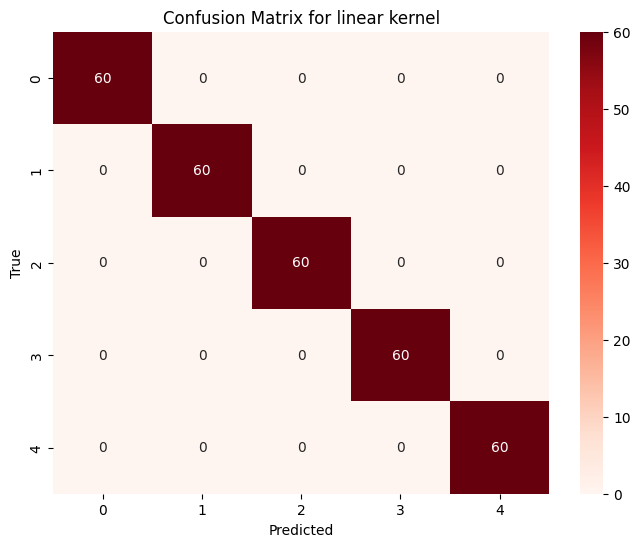

Training SVM with POLY kernel...
Performance metrics for poly kernel:
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91        60
           1       0.94      0.85      0.89        60
           2       0.79      0.95      0.86        60
           3       0.97      0.97      0.97        60
           4       1.00      1.00      1.00        60

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

Confusion Matrix:
[[52  1  7  0  0]
 [ 1 51  8  0  0]
 [ 1  0 57  2  0]
 [ 0  2  0 58  0]
 [ 0  0  0  0 60]]
Accuracy: 0.9266666666666666
Sensitivity (Macro-average recall): 0.9266666666666667
Precision (Macro-average precision): 0.9331481481481483
F1 Score (Macro-average F1-score): 0.9274641148325358

Recall for class 0: 0.8666666666666667
Specificity for class 0: 0.9916666666666667

Recall for class 1: 0.85
Speci

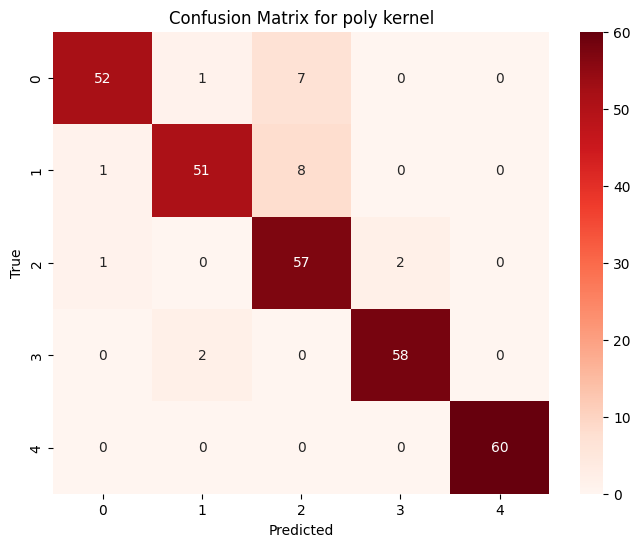

Training SVM with RBF kernel...
Performance metrics for rbf kernel:
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.68      0.78        60
           1       0.67      0.82      0.74        60
           2       0.64      0.62      0.63        60
           3       0.83      0.95      0.88        60
           4       1.00      0.92      0.96        60

    accuracy                           0.80       300
   macro avg       0.81      0.80      0.80       300
weighted avg       0.81      0.80      0.80       300

Confusion Matrix:
[[41  6 10  3  0]
 [ 1 49 10  0  0]
 [ 3 12 37  8  0]
 [ 0  3  0 57  0]
 [ 0  3  1  1 55]]
Accuracy: 0.7966666666666666
Sensitivity (Macro-average recall): 0.7966666666666666
Precision (Macro-average precision): 0.8092723957655876
F1 Score (Macro-average F1-score): 0.7970311599292657

Recall for class 0: 0.6833333333333333
Specificity for class 0: 0.9833333333333333

Recall for class 1: 0.8166666666

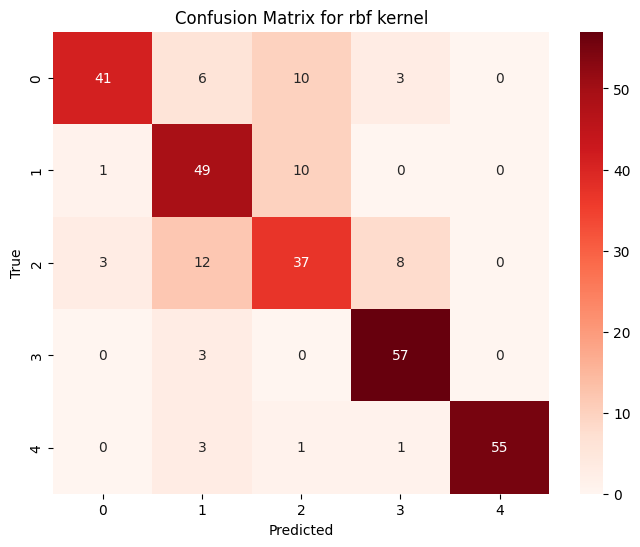

Training SVM with SIGMOID kernel...
Performance metrics for sigmoid kernel:
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.57      0.66        60
           1       0.52      0.73      0.61        60
           2       0.45      0.30      0.36        60
           3       0.67      0.93      0.78        60
           4       0.88      0.72      0.79        60

    accuracy                           0.65       300
   macro avg       0.66      0.65      0.64       300
weighted avg       0.66      0.65      0.64       300

Confusion Matrix:
[[34  8 10  6  2]
 [ 4 44 12  0  0]
 [ 5 23 18 11  3]
 [ 0  3  0 56  1]
 [ 0  7  0 10 43]]
Accuracy: 0.65
Sensitivity (Macro-average recall): 0.65
Precision (Macro-average precision): 0.662118909766204
F1 Score (Macro-average F1-score): 0.6398596670772552

Recall for class 0: 0.5666666666666667
Specificity for class 0: 0.9625

Recall for class 1: 0.7333333333333333
Specificity for class 1: 0

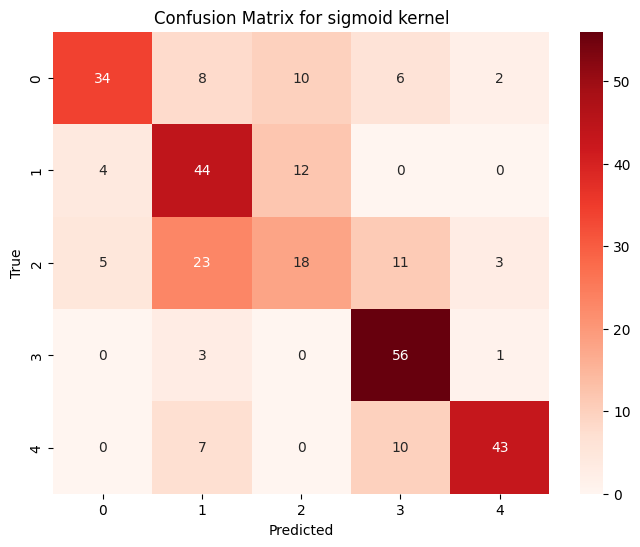

Training SVM with POLYNOMIAL_EXPONENTIAL kernel...
Performance metrics for polynomial_exponential kernel:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        60
           2       1.00      1.00      1.00        60
           3       1.00      1.00      1.00        60
           4       1.00      1.00      1.00        60

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Confusion Matrix:
[[60  0  0  0  0]
 [ 0 60  0  0  0]
 [ 0  0 60  0  0]
 [ 0  0  0 60  0]
 [ 0  0  0  0 60]]
Accuracy: 1.0
Sensitivity (Macro-average recall): 1.0
Precision (Macro-average precision): 1.0
F1 Score (Macro-average F1-score): 1.0

Recall for class 0: 1.0
Specificity for class 0: 1.0

Recall for class 1: 1.0
Specificity for class 1: 1.0

Recall for class 2: 1.0
Specif

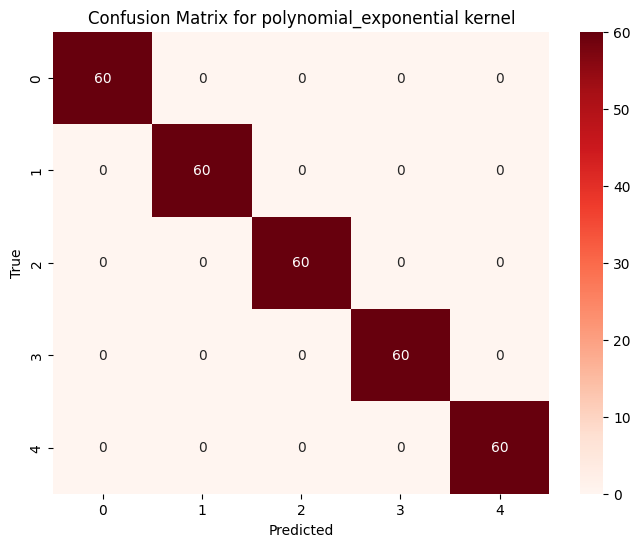

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score
import seaborn as sns

# Flatten the features
x_train_flat = np.array([feature.flatten() for feature in x_train])
x_test_flat = np.array([feature.flatten() for feature in x_test])

# List of kernels to try
kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'polynomial_exponential']

for kernel in kernels:
    print(f"\033[1mTraining SVM with {kernel.upper()} kernel...\033[0m")

    # Train SVM classifier
    if kernel == 'polynomial_exponential':
        clf = svm.SVC(kernel='precomputed')
        # Pre-compute the kernel matrix
        gram_train = np.dot(x_train_flat, x_train_flat.T)
        clf.fit(gram_train, y_train)
        gram_test = np.dot(x_test_flat, x_train_flat.T)
    else:
        clf = svm.SVC(kernel=kernel)
        clf.fit(x_train_flat, y_train)

    # Predict on test set
    if kernel == 'polynomial_exponential':
        y_pred = clf.predict(gram_test)
    else:
        y_pred = clf.predict(x_test_flat)

    # Print performance metrics
    print(f'Performance metrics for {kernel} kernel:')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))  # Classification report with precision, recall, F1-score
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))  # Confusion matrix

    # Additional performance metrics
    accuracy = metrics.accuracy_score(y_test, y_pred)
    sensitivity = metrics.recall_score(y_test, y_pred, average='macro')
    precision = metrics.precision_score(y_test, y_pred, average='macro')
    f1 = metrics.f1_score(y_test, y_pred, average='macro')

    # Compute recall for each class
    recalls = recall_score(y_test, y_pred, average=None)

    # Compute specificity for each class
    # Specificity = TN / (TN + FP)
    cm = confusion_matrix(y_test, y_pred)
    specificity = []
    for i in range(cm.shape[0]):
        tn = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
        fp = np.sum(cm[:, i]) - cm[i, i]
        specificity.append(tn / (tn + fp))

    print(f'Accuracy: {accuracy}')
    print(f'Sensitivity (Macro-average recall): {sensitivity}')
    print(f'Precision (Macro-average precision): {precision}')
    print(f'F1 Score (Macro-average F1-score): {f1}\n')

    for i, (recall, specific) in enumerate(zip(recalls, specificity)):
        print(f'Recall for class {i}: {recall}')
        print(f'Specificity for class {i}: {specific}\n')

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=range(5), yticklabels=range(5))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {kernel} kernel')
    plt.show()
